Utilizando esse conjunto de dados:  
https://www.kaggle.com/datasets/disham993/9000-movies-dataset

Responda as seguintes perguntas:

**1. Qual tamanho do DataSet?**  
R: 691.8+ KB

**2. Quantas linhas?**  
R: 9837

**3. Quantas colunas?**  
R: 9

**4. Qual o tipo de variável de cada coluna?**  
```
 0   Release_Date          object 
 1   Title                 object 
 2   Overview              object 
 3   Popularity            float64
 4   Vote_Count            object 
 5   Vote_Average          object 
 6   Original_Language     object 
 7   Genre                 object 
 8   Poster_Url            object 
```

**5. Qual o filme com maior número de votações?**

**6. Qual filme teve a maior nota (critério de desempate é o filme com mais votos)**  
R: Inception (31077 votos)

**7. Existem valores nulos? Se sim, qual tratamento irá realizar? (Se não temos nome de algum filme, melhor nem considerar)**  
R: Sim, removido titulo  
```
Vote_Count           11
Genre                11
Poster_Url           11
Popularity           10
Vote_Average         10
Original_Language    10
Title                 9
Overview              9
Release_Date          0
dtype: int64
```

**8. Transforme as variaveis categóricas de linguagem e genero em númericas (utilize dummy)**

**9. Normalize as variaveis numéricas**

**10. Armazene esses valores como um artefato dentro do MLFlow**

**11. Quais insights é possivel obter desses dados?**

## Importando Bibliotecas Necessárias

In [31]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# MLflow para rastreamento de experimentos
import mlflow

# Supressão de avisos
import warnings
warnings.filterwarnings("ignore")

## Noções Básicas sobre o MLflow

In [2]:
# Iniciar um experimento no MLflow
mlflow.start_run()

# Registrar um parâmetro
mlflow.log_param("parametro1", "valor1")

# Registrar uma métrica
mlflow.log_metric("metrica1", 0.85)

# Encerrar o experimento
mlflow.end_run()

print("Experimento do MLflow registrado com sucesso.")

Experimento do MLflow registrado com sucesso.


## Extração de Dados

In [4]:
import pandas as pd

# Carregar o dataset
dados = pd.read_csv("mymoviedb.csv", engine='python', on_bad_lines='skip')
dados.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## Análise exploratória

In [20]:
# Convert Vote_Count to numeric, coercing errors to NaN
dados['Vote_Count'] = pd.to_numeric(dados['Vote_Count'], errors='coerce')

max_score_index = dados['Vote_Count'].idxmax()
name_with_max_score = dados.loc[max_score_index, 'Title']
vote_count_max = dados.loc[max_score_index, 'Vote_Count']
display(f"Filme com maior número de votações: {name_with_max_score} (Votos: {vote_count_max})")

display("---------------")

display(dados.head())

# Exibir informações sobre o dataset
print(dados.info())

# Exibir dimensões do dataset
print('Dimensões:', dados.shape)

# Exibir estatísticas básicas
display(dados.describe())

# Verificar valores ausentes
display(dados.isnull().sum().sort_values(ascending=False))

'Filme com maior número de votações: Inception (Votos: 31077.0)'

'---------------'

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), object(7)
memory usage: 691.8+ KB
None
Dimensões: (9837, 9)


,Popularity,Vote_Count
count,9827.000000,9826.000000
mean,40.320570,1392.943721
std,108.874308,2611.303856
min,7.100000,0.000000
25%,16.127500,146.000000
50%,21.191000,444.000000
75%,35.174500,1376.000000
max,5083.954000,31077.000000


Vote_Count           11
Genre                11
Poster_Url           11
Popularity           10
Vote_Average         10
Original_Language    10
Title                 9
Overview              9
Release_Date          0
dtype: int64

## Tratamento de outliers

In [21]:
# Clean the null values in Title Column
dados['Title'] = dados['Title'].fillna('Título Desconhecido')

# Verificar valores ausentes após o tratamento
display(dados.isnull().sum().sort_values(ascending=False))

Vote_Count           11
Genre                11
Poster_Url           11
Popularity           10
Vote_Average         10
Original_Language    10
Overview              9
Release_Date          0
Title                 0
dtype: int64

## Transforma as variaveis categóricas de linguagem e genero em númericas (utilize dummy)

In [27]:
# Check if dummies are already applied
if 'Original_Language' in dados.columns and 'Genre' in dados.columns:
    print("Applying dummies...")
    dados = pd.get_dummies(dados, columns=['Original_Language', 'Genre'], drop_first=True)
else:
    print("Dummies already applied or columns missing.")

Dummies already applied or columns missing.


In [29]:
# Verificar o dataset após a transformação
display(dados.head())

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Poster_Url,Original_Language_bn,Original_Language_ca,Original_Language_cn,...,"Genre_Western, Drama","Genre_Western, Drama, Action, Adventure","Genre_Western, Drama, Adventure","Genre_Western, Drama, Crime","Genre_Western, Drama, History","Genre_Western, Drama, Mystery","Genre_Western, History","Genre_Western, Horror","Genre_Western, Mystery, Thriller, Drama","Genre_Western, Thriller"
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,https://image.tmdb.org/t/p/original/74xTEgt7R3...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,https://image.tmdb.org/t/p/original/4j0PNHkMr5...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Normaliza as variaveis numéricas

In [32]:
# Convert Vote_Average to numeric if not already
dados['Vote_Average'] = pd.to_numeric(dados['Vote_Average'], errors='coerce')

# Select numerical columns to normalize
numerical_cols = ['Popularity', 'Vote_Count', 'Vote_Average']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
dados[numerical_cols] = scaler.fit_transform(dados[numerical_cols])

# Display the first few rows to verify
display(dados[numerical_cols].head())

,Popularity,Vote_Count,Vote_Average
0,46.327643,2.890296,1.646869
1,34.788099,-0.092657,1.469837
2,23.677740,-0.486733,-0.123450
3,21.694747,1.410500,1.115773
4,17.040612,0.153210,0.496162


## Armazena esses valores como um artefato dentro do MLFlow

In [ ]:
## Armazena esses valores como um artefato dentro do MLFlow

In [33]:
mlflow.start_run()

# Salvar o DataFrame processado em um arquivo CSV
dados.to_csv('dados_processados.csv', index=False)

# Registrar o arquivo como artefato
mlflow.log_artifact('dados_processados.csv')

# Encerrar o experimento
mlflow.end_run()

print("DataFrame armazenado como artefato no MLFlow.")

DataFrame armazenado como artefato no MLFlow.


## Insights é possiveis obter desses dados

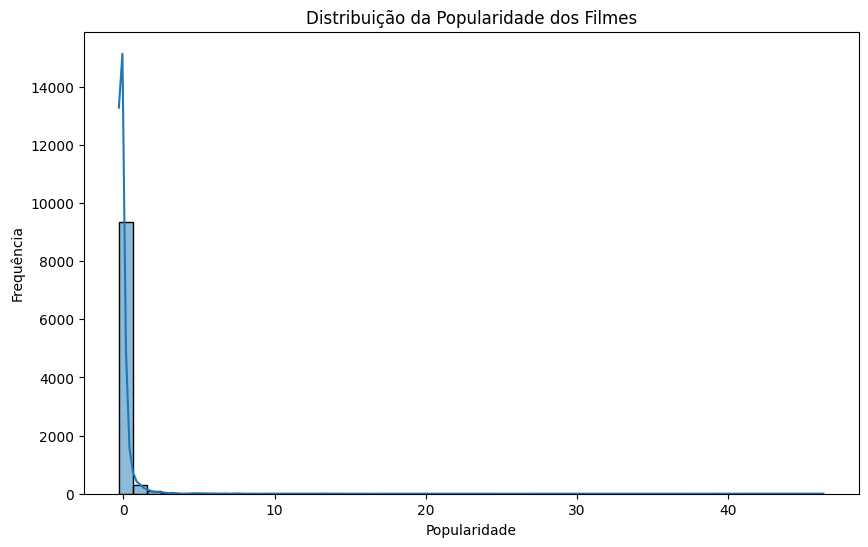

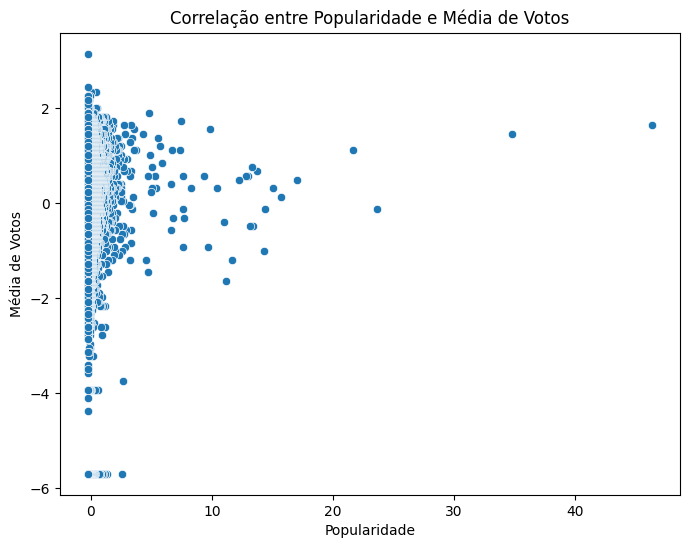

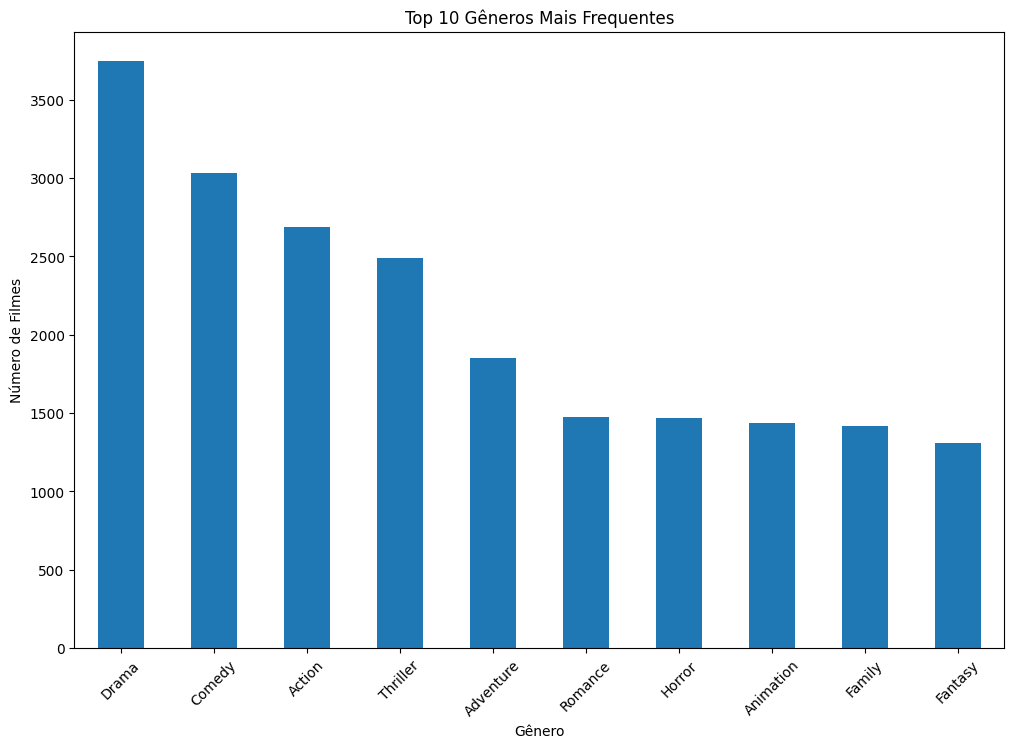

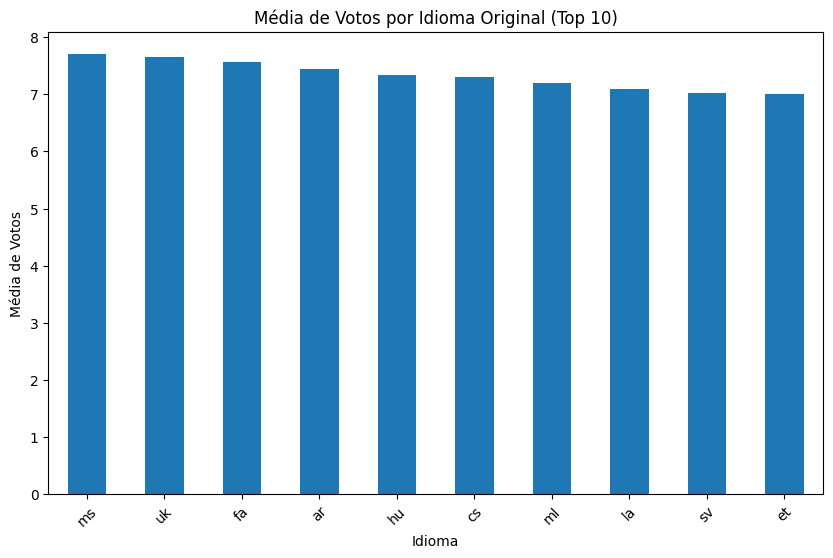

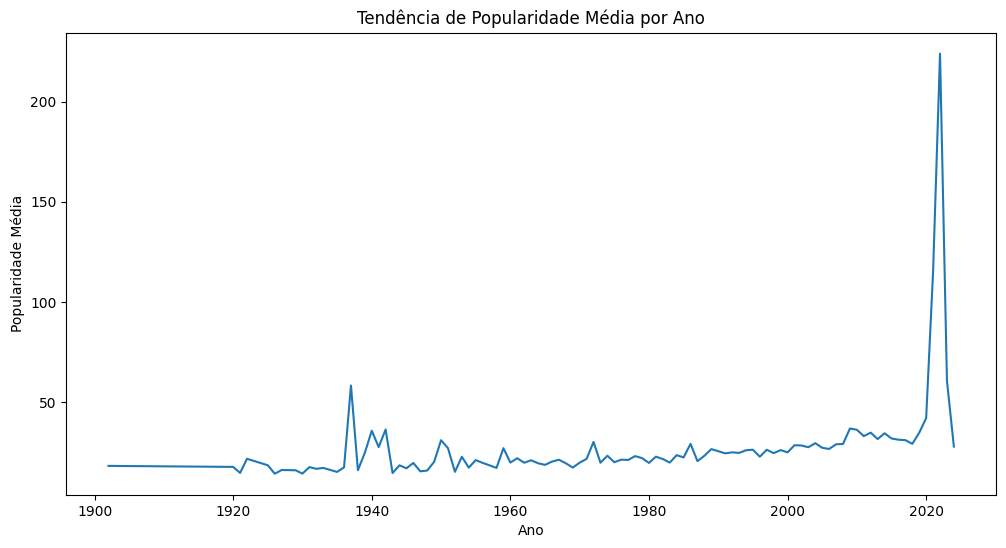

Insights gerados com sucesso!


In [ ]:
# Insights possíveis dos dados

# Carregar dados originais para análises
dados_originais = pd.read_csv("mymoviedb.csv", engine='python', on_bad_lines='skip')
dados_originais['Vote_Average'] = pd.to_numeric(dados_originais['Vote_Average'], errors='coerce')
dados_originais['Vote_Count'] = pd.to_numeric(dados_originais['Vote_Count'], errors='coerce')

# 1. Distribuição de Popularidade
plt.figure(figsize=(10, 6))
sns.histplot(dados['Popularity'], bins=50, kde=True)
plt.title('Distribuição da Popularidade dos Filmes')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.show()

# 2. Correlação entre Popularidade e Média de Votos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Popularity', y='Vote_Average', data=dados)
plt.title('Correlação entre Popularidade e Média de Votos')
plt.xlabel('Popularidade')
plt.ylabel('Média de Votos')
plt.show()

# 3. Top 10 Gêneros mais frequentes
generos = dados_originais['Genre'].str.split(', ', expand=True).stack().value_counts()
plt.figure(figsize=(12, 8))
generos.head(10).plot(kind='bar')
plt.title('Top 10 Gêneros Mais Frequentes')
plt.xlabel('Gênero')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45)
plt.show()

# 4. Média de Votos por Idioma Original
idiomas = dados_originais.groupby('Original_Language')['Vote_Average'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
idiomas.plot(kind='bar')
plt.title('Média de Votos por Idioma Original (Top 10)')
plt.xlabel('Idioma')
plt.ylabel('Média de Votos')
plt.xticks(rotation=45)
plt.show()

# 5. Tendência de Popularidade ao Longo do Tempo
dados_originais['Release_Date'] = pd.to_datetime(dados_originais['Release_Date'], errors='coerce')
dados_originais['Year'] = dados_originais['Release_Date'].dt.year
popularidade_por_ano = dados_originais.groupby('Year')['Popularity'].mean()
plt.figure(figsize=(12, 6))
popularidade_por_ano.plot()
plt.title('Tendência de Popularidade Média por Ano')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.show()
